In [1]:
library(tuneR, warn.conflicts = F, quietly = T)
library(signal, warn.conflicts = F, quietly = T) # signal processing functions
library(oce, warn.conflicts = F, quietly = T) # image plotting functions and nice color maps
library(Rwave, warn.conflicts = F, quietly = T)

Linking to GEOS 3.9.1, GDAL 3.3.0, PROJ 8.0.0



In [2]:
data <- readMP3("../DATA/beethoven_40sec.mp3")

#Extract sound
snd <- data@left

#Determine duration
duration = length(snd)/data@samp.rate

#Sampling rate
fs = data@samp.rate

# demeant to remove DC offset
snd = snd - mean(snd)

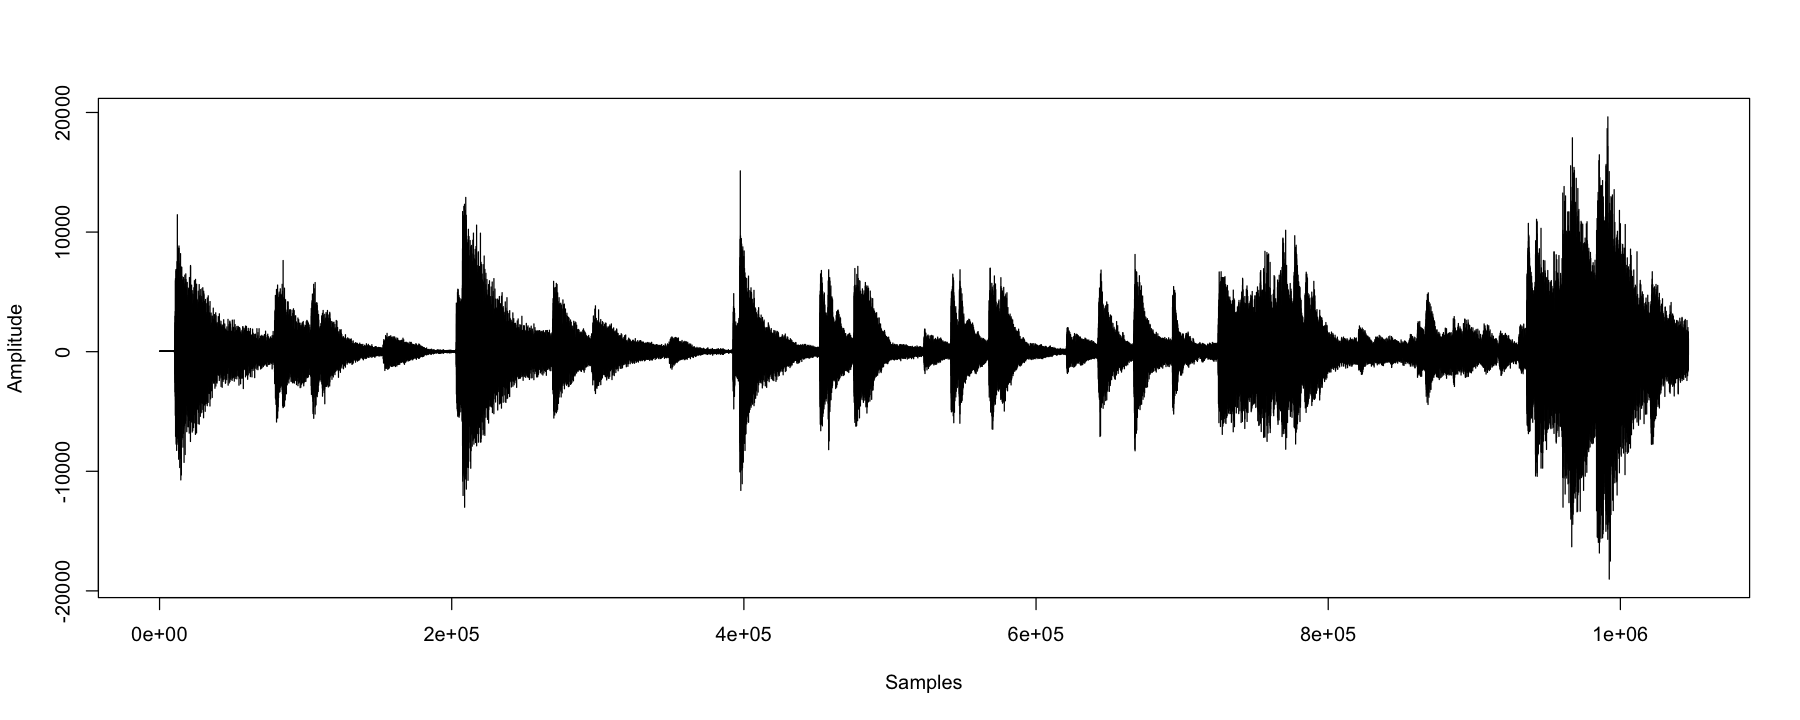

In [3]:
# plot waveform
options(repr.plot.width=15, repr.plot.height=6)
plot(snd, type = 'l', xlab = 'Samples', ylab = 'Amplitude')

In [4]:
# number of points to use for the fft
nfft=1024

# window size (in points)
window=256

# overlap (in points)
overlap=128

# create spectrogram
spec = specgram(x = snd,
                n = nfft,
                Fs = fs,
                window = window,
                overlap = overlap
)

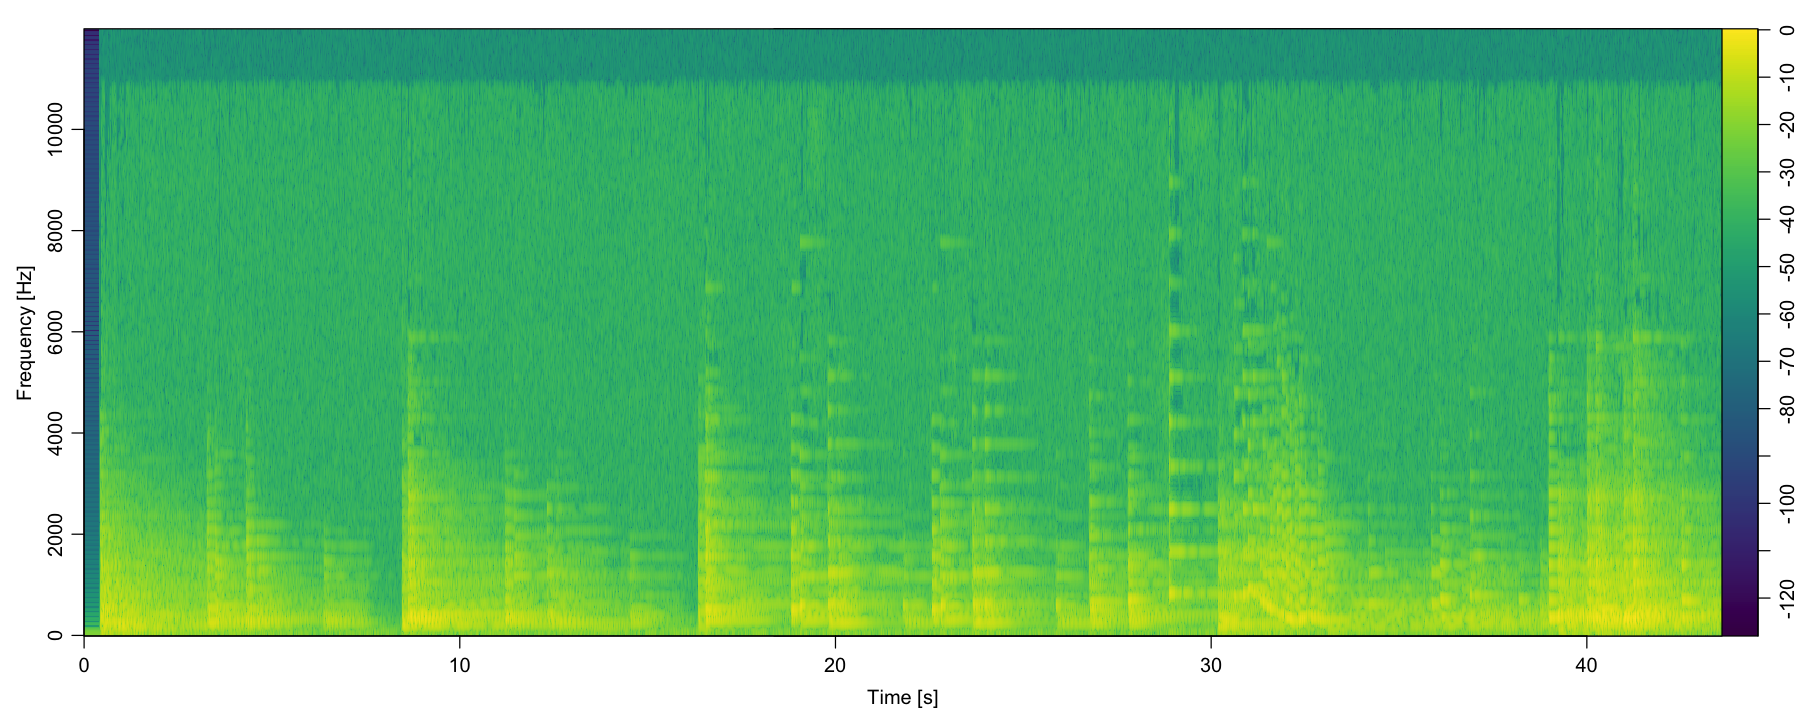

In [5]:
# discard phase information
P = abs(spec$S)

# normalize
P = P/max(P)

# convert to dB
P = 10*log10(P)

# config time axis
t = spec$t

# plot spectrogram
imagep(x = t,
       y = spec$f,
       z = t(P),
       col = oce.colorsViridis,
       ylab = 'Frequency [Hz]',
       xlab = 'Time [s]',
       drawPalette = T,
       decimate = F
)